# Data EDA for IE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

color = sns.color_palette()

%matplotlib inline

In [2]:
train_data = pd.read_json(open(r'./data/train_data.json', 'r', encoding='utf8'), lines=True)
dev_data = pd.read_json(open(r'./data/dev_data.json', 'r', encoding='utf8'), lines=True)

len(train_data), len(dev_data) # 173109， 21639
train_data

(173109, 21639)

,postag,spo_list,text
0,"[{'word': '如何', 'pos': 'r'}, {'word': '演', 'po...","[{'predicate': '主演', 'object_type': '人物', 'sub...",如何演好自己的角色，请读《演员自我修养》《喜剧之王》周星驰崛起于穷困潦倒之中的独门秘笈
1,"[{'word': '茶树茶网蝽', 'pos': 'nz'}, {'word': '，',...","[{'predicate': '目', 'object_type': '目', 'subje...",茶树茶网蝽，Stephanitis chinensis Drake，属半翅目网蝽科冠网椿属的...
2,"[{'word': '丝角蝗科', 'pos': 'nz'}, {'word': '，', ...","[{'predicate': '目', 'object_type': '目', 'subje...",丝角蝗科，Oedipodidae，昆虫纲直翅目蝗总科的一个科
3,"[{'word': '爱德华', 'pos': 'nr'}, {'word': '·', '...","[{'predicate': '身高', 'object_type': 'Number', ...",爱德华·尼科·埃尔南迪斯（1986-），是一位身高只有70公分哥伦比亚男子，体重10公斤，只...
4,"[{'word': '《', 'pos': 'w'}, {'word': '逐风行', 'p...","[{'predicate': '连载网站', 'object_type': '网站', 's...",《逐风行》是百度文学旗下纵横中文网签约作家清水秋风创作的一部东方玄幻小说，小说已于2014-...
5,"[{'word': '禅意', 'pos': 'n'}, {'word': '歌者', 'p...","[{'predicate': '歌手', 'object_type': '人物', 'sub...",禅意歌者刘珂矣《一袖云》中诉知己…绵柔纯净的女声，将心中的万水千山尽意勾勒于这清素画音中
6,"[{'word': '南迦帕尔巴特峰', 'pos': 'ns'}, {'word': '，...","[{'predicate': '海拔', 'object_type': 'Number', ...",南迦帕尔巴特峰，8125米
7,"[{'word': '《', 'pos': 'w'}, {'word': '身外身梦中梦',...","[{'predicate': '作者', 'object_type': '人物', 'sub...",《身外身梦中梦》是连载于晋江文学城的一部原创类小说，作者是苍生笑
8,"[{'word': '谢万松', 'pos': 'nr'}, {'word': '，', '...","[{'predicate': '出生地', 'object_type': '地点', 'su...",谢万松，字树人，湖北省武汉市人，武汉钢铁集团公司联合焦化公司退体职工，生于1940年
9,"[{'word': '《', 'pos': 'w'}, {'word': '娘家的故事第二部...","[{'predicate': '导演', 'object_type': '人物', 'sub...",《娘家的故事第二部》是张玲执导，林在培、何赛飞等主演的电视剧


## SPO_list分析

### 长度分析
spo_list的长度

In [3]:
train_data['num_of_spo'] = train_data['spo_list'].apply(lambda x: len(x))
dev_data['num_of_spo'] = dev_data['spo_list'].apply(lambda x: len(x))

train_data['num_of_spo'].describe()
dev_data['num_of_spo'].describe()

count    173109.000000
mean          2.017607
std           1.500076
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          25.000000
Name: num_of_spo, dtype: float64

count    21639.000000
mean         2.021766
std          1.501036
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         20.000000
Name: num_of_spo, dtype: float64

### 类别统计

In [4]:
train_labels_dict = {}
for i in range(len(train_data)):
    for j in range(len(train_data['spo_list'][i])):
        predicate = train_data['spo_list'][i][j]['predicate']
        if predicate not in train_labels_dict:
            train_labels_dict[predicate] = 0
        train_labels_dict[predicate] += 1

<Figure size 864x720 with 0 Axes>

Text(0.5,0,'Number of Occurrences')

Text(0,0.5,'Name of predicate')

Text(0.5,1,'train')

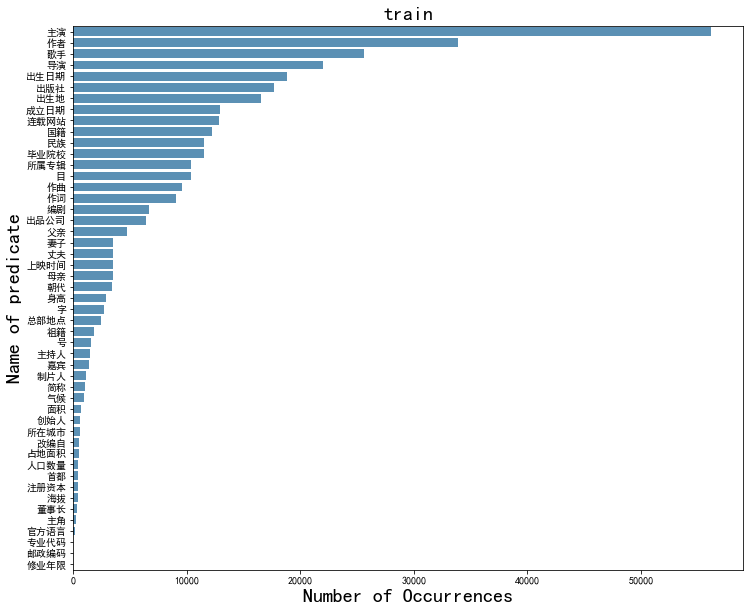

In [5]:
sort_train_labels_dict = sorted(train_labels_dict.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12,10))
sns.barplot(list(list(zip(*sort_train_labels_dict))[1]), list(list(zip(*sort_train_labels_dict))[0]), alpha=0.8, color=color[0])
plt.xlabel('Number of Occurrences', fontsize=20)
plt.ylabel('Name of predicate', fontsize=20)
# plt.yticks(rotation='vertical')
plt.title('train', fontsize=20)
plt.show()

In [6]:
dev_labels_dict = {}
for i in range(len(dev_data)):
    for j in range(len(dev_data['spo_list'][i])):
        predicate = dev_data['spo_list'][i][j]['predicate']
        if predicate not in dev_labels_dict:
            dev_labels_dict[predicate] = 0
        dev_labels_dict[predicate] += 1

<Figure size 864x720 with 0 Axes>

Text(0.5,0,'Number of Occurrences')

Text(0,0.5,'Name of predicate')

Text(0.5,1,'dev')

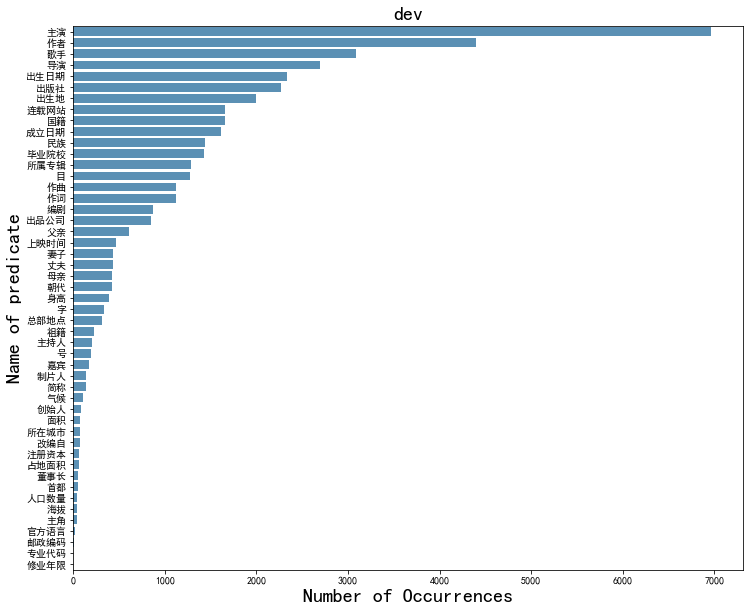

In [7]:
sort_dev_labels_dict = sorted(dev_labels_dict.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12,10))
sns.barplot(list(list(zip(*sort_dev_labels_dict))[1]), list(list(zip(*sort_dev_labels_dict))[0]), alpha=0.8, color=color[0])
plt.xlabel('Number of Occurrences', fontsize=20)
plt.ylabel('Name of predicate', fontsize=20)
plt.title('dev', fontsize=20)
plt.show()

spo_list方面，训练集和验证集分布基本一致。而在类别分布上出现明显的长尾现象：关系为“主演”的最多，为“修业年限”的最少

### 类别间的关系
如predicate为“主演”的，通常会与其他哪些predicate一起出现

In [8]:
predicate_schemas = pd.read_json(open(r"./data/all_50_schemas", "r", encoding="utf8"), lines=True)["predicate"].tolist()
predicate_schemas.remove("成立日期")
len(predicate_schemas)

49

由于prediacte为“成立日期”的有两个，其subject_type分别是“机构”和“公司”。如果官方说的最终评测不需要实体类型的话，则没有必要将这两个predicate分开，所以此处去重

In [9]:
def predicate_interact(input_data, predicate, predicate_schemas):
    keys = list(predicate_schemas)
    values = [0 for _ in range(len(keys) + 1)]
    interact_dict = dict(zip(keys, values))
    for i in range(len(input_data)):
        if i == 43:
            continue
        tmp = []
        for j in range(len(input_data['spo_list'][i])):
            tmp.append(input_data['spo_list'][i][j]['predicate'])
            if predicate in tmp:
                for l in tmp:
                    interact_dict[l] += 1

    sort_interact_dict = sorted(interact_dict.items(), key=lambda x: x[1], reverse=True)
    return interact_dict, sort_interact_dict

训练集

In [10]:
train_interact_matrix, train_sort_matrix = [], []
for pred in tqdm_notebook(predicate_schemas):
    interact_cur, sort_interact_cur = predicate_interact(train_data, pred, predicate_schemas)
    train_interact_matrix.append(interact_cur)
    train_sort_matrix.append(sort_interact_cur)

In [11]:
train_interact_matrix = [i.values() for i in train_interact_matrix]

map_train_interact_matrix = pd.DataFrame(train_interact_matrix, index=predicate_schemas, columns=predicate_schemas)
map_train_interact_matrix

,祖籍,父亲,总部地点,出生地,目,面积,简称,上映时间,妻子,所属专辑,...,人口数量,所在城市,作者,成立日期,作曲,气候,嘉宾,主演,改编自,创始人
祖籍,3037,76,0,1050,0,0,0,4,4,0,...,0,0,15,0,0,0,0,29,0,6
父亲,68,7471,0,641,0,0,0,2,586,0,...,0,1,49,2,0,0,11,96,0,15
总部地点,0,0,3235,11,0,0,3,2,0,0,...,0,2,4,1317,0,0,0,57,0,90
出生地,1032,612,11,31207,0,0,2,32,176,52,...,0,14,117,24,90,0,12,1128,3,46
目,0,0,0,0,12699,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
面积,0,0,0,0,0,739,0,0,0,0,...,126,0,0,1,0,2,0,0,0,0
简称,0,0,3,2,0,0,1125,0,0,0,...,0,0,2,49,1,0,0,6,0,0
上映时间,4,2,2,32,0,0,0,7163,1,21,...,0,0,78,4,34,0,28,10088,28,0
妻子,4,678,0,194,0,0,0,1,5086,0,...,0,1,23,5,6,0,21,131,0,0
所属专辑,0,0,0,52,0,0,0,20,0,20600,...,0,0,13,0,7389,0,5,57,0,0


<Figure size 864x720 with 0 Axes>

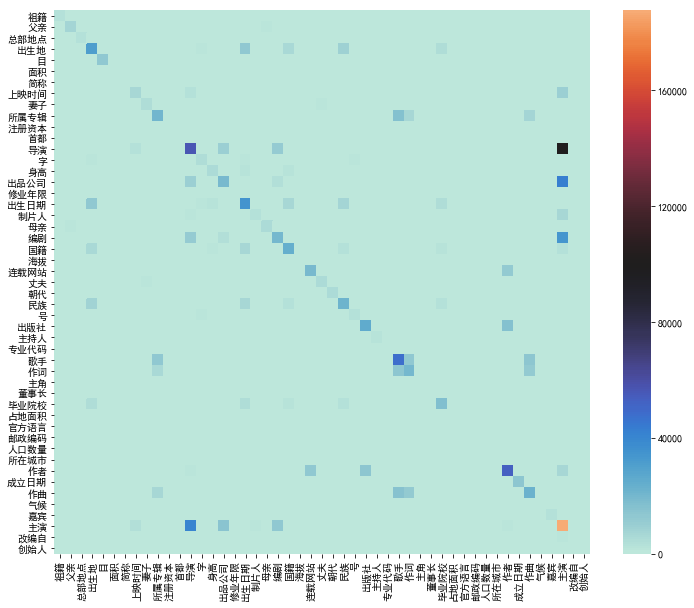

In [12]:
plt.figure(figsize=(12,10))
cmap = sns.cubehelix_palette(start=1, rot=3, gamma=0.8, as_cmap=False)
sns.heatmap(map_train_interact_matrix, center=100000)
plt.show()

验证集

In [13]:
dev_interact_matrix, dev_sort_matrix = [], []
for pred in tqdm_notebook(predicate_schemas):
    interact_cur, sort_interact_cur = predicate_interact(dev_data, pred, predicate_schemas)
    dev_interact_matrix.append(interact_cur)
    dev_sort_matrix.append(sort_interact_cur)

In [14]:
dev_interact_matrix = [i.values() for i in dev_interact_matrix]

map_dev_interact_matrix = pd.DataFrame(dev_interact_matrix, index=predicate_schemas, columns=predicate_schemas)
map_dev_interact_matrix

,祖籍,父亲,总部地点,出生地,目,面积,简称,上映时间,妻子,所属专辑,...,人口数量,所在城市,作者,成立日期,作曲,气候,嘉宾,主演,改编自,创始人
祖籍,379,8,0,116,0,0,0,0,8,0,...,0,0,2,0,0,0,0,1,0,1
父亲,8,956,0,82,0,0,0,0,97,0,...,0,0,6,0,0,0,2,6,0,0
总部地点,0,0,393,1,0,0,0,0,0,0,...,0,0,0,147,0,0,0,1,0,12
出生地,119,76,1,3838,0,0,1,3,36,5,...,0,2,17,1,3,0,1,93,0,7
目,0,0,0,0,1569,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
面积,0,0,0,0,0,90,0,0,0,0,...,13,0,0,0,0,3,0,0,0,0
简称,0,0,0,1,0,0,168,3,0,0,...,0,0,0,5,0,0,0,14,0,0
上映时间,0,0,0,3,0,0,3,1009,0,0,...,0,0,10,0,2,0,0,1553,4,0
妻子,8,111,0,37,0,0,0,0,645,1,...,0,0,6,0,2,0,1,25,0,0
所属专辑,0,0,0,5,0,0,0,0,1,2537,...,0,0,1,0,805,0,6,38,0,0


<Figure size 864x720 with 0 Axes>

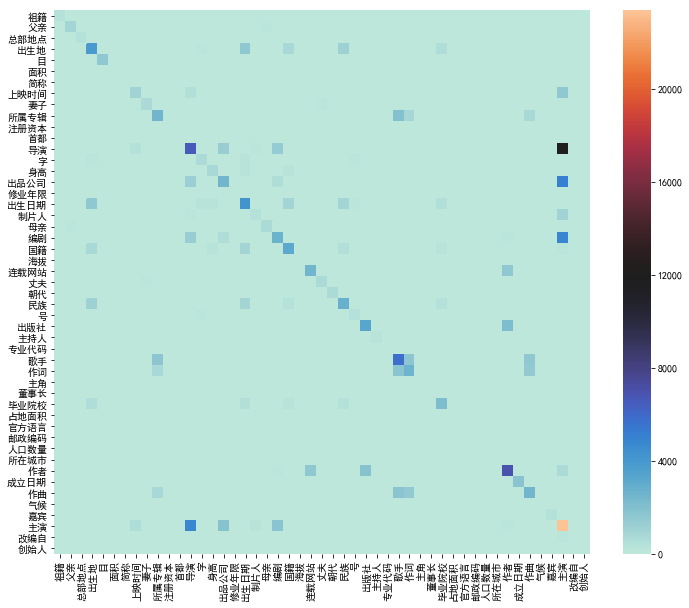

In [15]:
plt.figure(figsize=(12,10))
cmap = sns.cubehelix_palette(start=1, rot=3, gamma=0.8, as_cmap=False)
sns.heatmap(map_dev_interact_matrix, center=12000)
plt.show()

上图可以看出，predicate为“主演”时，往往伴有“导演”“出品公司”“编剧”等predicate；“出生日期”往往伴有“出生地”“国籍”等。在设计模型时也许可以作为一种特征加以考虑。

'主演', '作者', '歌手', '导演', '出生日期', '出版社', '出生地', '成立日期', '连载网站', '国籍', '民族', '毕业院校', '所属专辑', '目', '作曲', '作词', '编剧', '出品公司', '父亲', '妻子', '丈夫', '上映时间', '母亲', '朝代', '身高', '字', '总部地点', '祖籍', '号', '主持人', '嘉宾', '制片人', '简称', '气候', '面积', '创始人', '所在城市', '改编自', '占地面积', '人口数量', '首都', '注册资本', '海拔', '董事长', '主角', '官方语言', '专业代码', '邮政编码', '修业年限'

## 数据分析

### 统计句长
使用官方的分词结果即可

In [16]:
train_data['num_of_word'] = train_data['postag'].apply(lambda x: len(x))
dev_data['num_of_word'] = dev_data['postag'].apply(lambda x: len(x))

train_data['num_of_word'].describe()
dev_data['num_of_word'].describe()

count    173109.000000
mean         26.081197
std          17.697508
min           0.000000
25%          14.000000
50%          21.000000
75%          33.000000
max         198.000000
Name: num_of_word, dtype: float64

count    21639.000000
mean        26.261934
std         17.890581
min          0.000000
25%         14.000000
50%         21.000000
75%         33.000000
max        183.000000
Name: num_of_word, dtype: float64

In [17]:
train_word_stas = train_data['num_of_word'].value_counts()
dev_word_stas = dev_data['num_of_word'].value_counts()

<Figure size 864x432 with 0 Axes>

Text(0,0.5,'Number of Occurrences')

Text(0.5,0,'Number of words in the text')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

Text(0.5,1,'train')

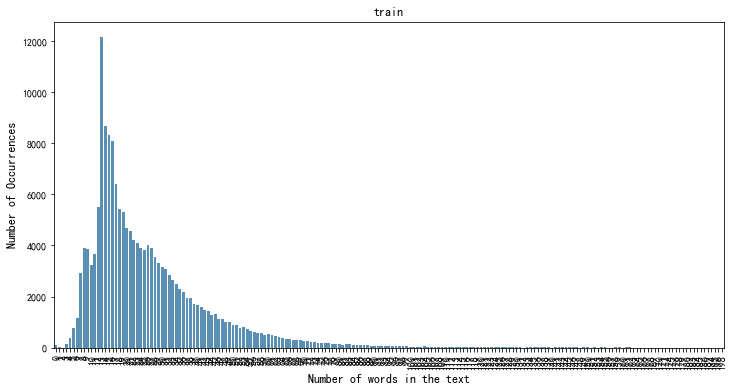

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(train_word_stas.index, train_word_stas.values, alpha=0.8, color=color[0])
# sns.distplot(train_word_stas, bins=30, hist = True, kde = True, norm_hist = False,
#              rug = True, vertical = False, color = color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the text', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('train')
plt.show()

<Figure size 864x432 with 0 Axes>

Text(0,0.5,'Number of Occurrences')

Text(0.5,0,'Number of words in the text')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156]), <a list of 157 Text xticklabel objects>)

Text(0.5,1,'dev')

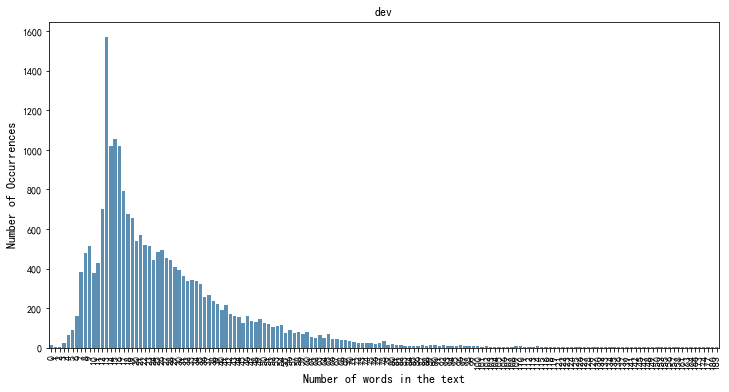

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(dev_word_stas.index, dev_word_stas.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the text', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('dev')
plt.show()

从统计结果来看，训练集和验证集在句长上分布基本一致

### 各类别标签对应词性分布

In [20]:
def namestr(obj):
    return [name for name in globals() if globals()[name] is obj]

def get_index(input_data, predicate):
    index = []
    for i in range(len(input_data["spo_list"])):
        for j in range(len(input_data["spo_list"][i])):
            if input_data["spo_list"][i][j]["predicate"] == predicate:
                index.append(i)
                break
    return index

def get_distribute(input_data, predicate, visual=True):
    process_data = input_data.iloc[get_index(input_data, predicate)].reset_index(drop=True)
    
    pos_distrib = {}
    for i in range(len(process_data)):
        for pos in process_data["postag"][i]:
            if pos['pos'] not in pos_distrib:
                pos_distrib[pos['pos']] = 0
            pos_distrib[pos['pos']] += 1
            
    sort_pos_distrib = sorted(pos_distrib.items(), key=lambda x: x[1], reverse=True)
            
    if visual:
        plt.figure(figsize=(12,6))
        sns.barplot(list(list(zip(*sort_pos_distrib))[0]), list(list(zip(*sort_pos_distrib))[1]), alpha=0.8, color=color[0])
        plt.ylabel('Number of Occurrence', fontsize=12)
        plt.xlabel('Name of pos', fontsize=12)
        plt.title('{}_{}'.format(namestr(input_data)[0], predicate))
        plt.show()
    return sort_pos_distrib

In [ ]:
POS	Meaning
n	common nouns
f	localizer
s	space
t	time
nr	noun of people
ns	noun of space
nt	noun of time
nw	noun of work
nz	other proper noun
v	verbs
vd	verb of adverbs
vn	verb of noun
a	adjective
ad	adjective of adverb
an	adnoun
d	adverbs
m	numeral
q	quantity
r	pronoun
p	prepositions
c	conjunction
u	auxiliary
xc	other function word
w	punctuations

主演

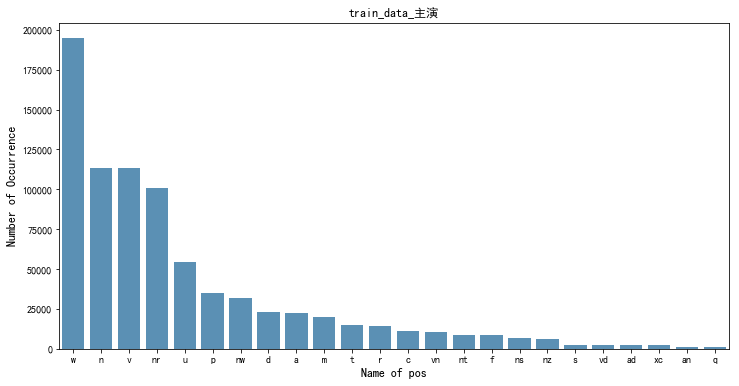

[('w', 194796),
 ('n', 113357),
 ('v', 113321),
 ('nr', 101014),
 ('u', 54666),
 ('p', 34915),
 ('nw', 31858),
 ('d', 23275),
 ('a', 22720),
 ('m', 20070),
 ('t', 14809),
 ('r', 14311),
 ('c', 11424),
 ('vn', 10693),
 ('nt', 8776),
 ('f', 8643),
 ('ns', 6890),
 ('nz', 6330),
 ('s', 2570),
 ('vd', 2358),
 ('ad', 2286),
 ('xc', 2264),
 ('an', 1073),
 ('q', 984)]

In [21]:
train_data_ZY = get_distribute(train_data, "主演", True)
train_data_ZY

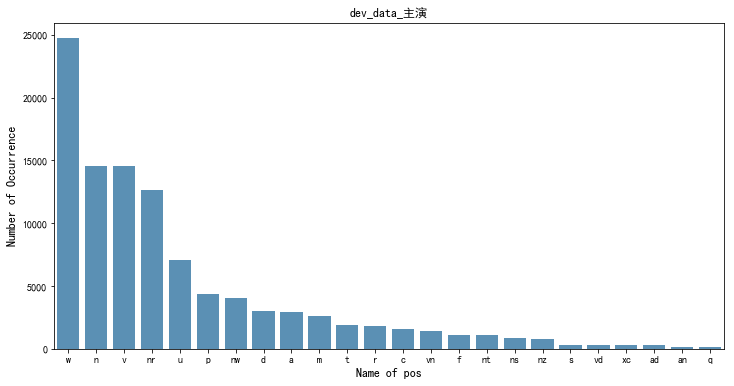

[('w', 24733),
 ('n', 14557),
 ('v', 14550),
 ('nr', 12654),
 ('u', 7082),
 ('p', 4393),
 ('nw', 4007),
 ('d', 3043),
 ('a', 2914),
 ('m', 2616),
 ('t', 1893),
 ('r', 1827),
 ('c', 1537),
 ('vn', 1388),
 ('f', 1126),
 ('nt', 1102),
 ('ns', 893),
 ('nz', 799),
 ('s', 321),
 ('vd', 298),
 ('xc', 285),
 ('ad', 283),
 ('an', 164),
 ('q', 137)]

In [22]:
dev_data_ZY = get_distribute(dev_data, "主演", True)
dev_data_ZY

目

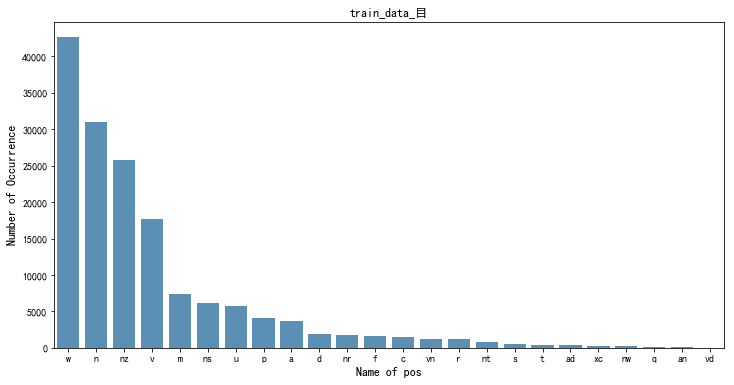

[('w', 42639),
 ('n', 30929),
 ('nz', 25839),
 ('v', 17625),
 ('m', 7399),
 ('ns', 6125),
 ('u', 5765),
 ('p', 4075),
 ('a', 3637),
 ('d', 1960),
 ('nr', 1812),
 ('f', 1677),
 ('c', 1438),
 ('vn', 1206),
 ('r', 1154),
 ('nt', 737),
 ('s', 553),
 ('t', 436),
 ('ad', 418),
 ('xc', 272),
 ('nw', 255),
 ('q', 89),
 ('an', 55),
 ('vd', 31)]

In [23]:
train_data_M = get_distribute(train_data, "目", True)
train_data_M

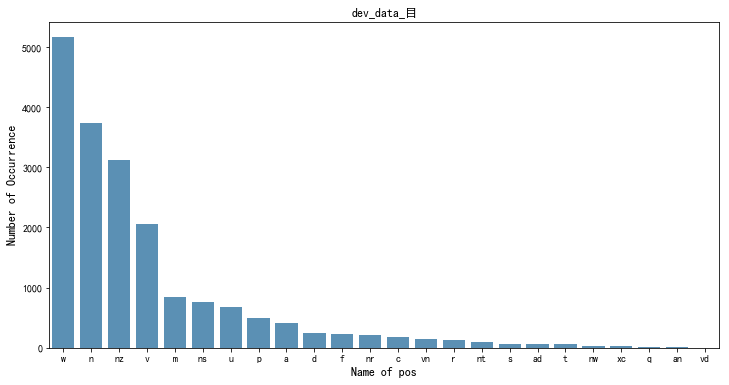

[('w', 5162),
 ('n', 3735),
 ('nz', 3125),
 ('v', 2055),
 ('m', 838),
 ('ns', 765),
 ('u', 682),
 ('p', 492),
 ('a', 413),
 ('d', 244),
 ('f', 229),
 ('nr', 214),
 ('c', 180),
 ('vn', 152),
 ('r', 128),
 ('nt', 93),
 ('s', 63),
 ('ad', 56),
 ('t', 55),
 ('nw', 32),
 ('xc', 26),
 ('q', 13),
 ('an', 11),
 ('vd', 2)]

In [24]:
dev_data_M= get_distribute(dev_data, "目", True)
dev_data_M

国籍

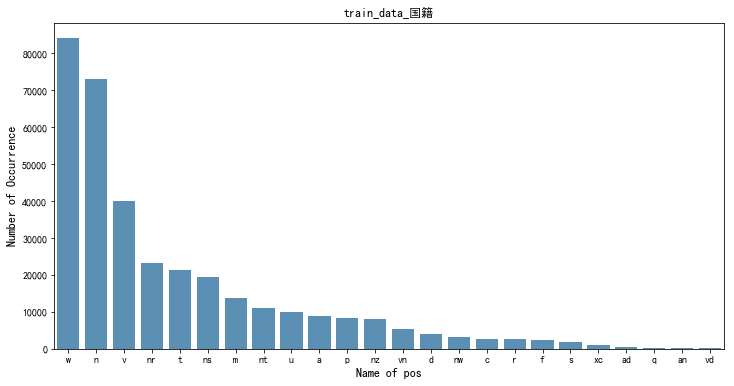

[('w', 84074),
 ('n', 73110),
 ('v', 40021),
 ('nr', 23129),
 ('t', 21230),
 ('ns', 19531),
 ('m', 13732),
 ('nt', 11110),
 ('u', 9843),
 ('a', 8809),
 ('p', 8246),
 ('nz', 7989),
 ('vn', 5472),
 ('d', 4056),
 ('nw', 3060),
 ('c', 2704),
 ('r', 2550),
 ('f', 2267),
 ('s', 1762),
 ('xc', 1118),
 ('ad', 617),
 ('q', 334),
 ('an', 229),
 ('vd', 152)]

In [25]:
train_data_GJ = get_distribute(train_data, "国籍", True)
train_data_GJ

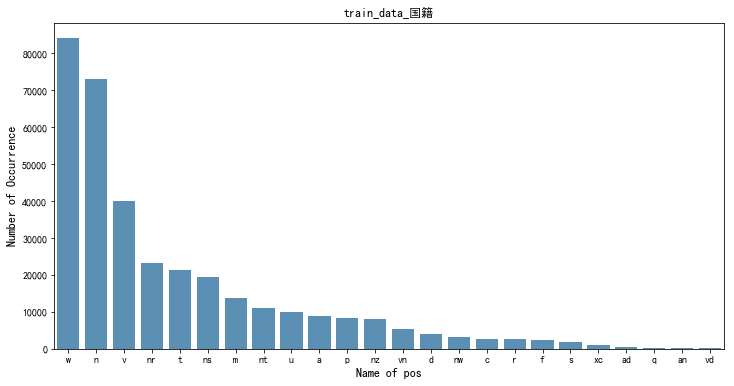

[('w', 84074),
 ('n', 73110),
 ('v', 40021),
 ('nr', 23129),
 ('t', 21230),
 ('ns', 19531),
 ('m', 13732),
 ('nt', 11110),
 ('u', 9843),
 ('a', 8809),
 ('p', 8246),
 ('nz', 7989),
 ('vn', 5472),
 ('d', 4056),
 ('nw', 3060),
 ('c', 2704),
 ('r', 2550),
 ('f', 2267),
 ('s', 1762),
 ('xc', 1118),
 ('ad', 617),
 ('q', 334),
 ('an', 229),
 ('vd', 152)]

In [26]:
train_data_GJ = get_distribute(train_data, "国籍", True)
train_data_GJ

不同predicate下句子的pos分布也不同，如“主演”的nw较多，在“目”和“国籍”两个里面nw则比较少；

In [29]:
train_data["text"][9], train_data["spo_list"][9], train_data["postag"][9]

('《娘家的故事第二部》是张玲执导，林在培、何赛飞等主演的电视剧',
 [{'predicate': '导演',
   'object_type': '人物',
   'subject_type': '影视作品',
   'object': '张玲',
   'subject': '娘家的故事第二部'},
  {'predicate': '主演',
   'object_type': '人物',
   'subject_type': '影视作品',
   'object': '林在培',
   'subject': '娘家的故事第二部'},
  {'predicate': '主演',
   'object_type': '人物',
   'subject_type': '影视作品',
   'object': '何赛飞',
   'subject': '娘家的故事第二部'}],
 [{'word': '《', 'pos': 'w'},
  {'word': '娘家的故事第二部', 'pos': 'nw'},
  {'word': '》', 'pos': 'w'},
  {'word': '是', 'pos': 'v'},
  {'word': '张玲', 'pos': 'nr'},
  {'word': '执导', 'pos': 'v'},
  {'word': '，', 'pos': 'w'},
  {'word': '林在培', 'pos': 'nr'},
  {'word': '、', 'pos': 'w'},
  {'word': '何赛飞', 'pos': 'nr'},
  {'word': '等', 'pos': 'u'},
  {'word': '主演', 'pos': 'v'},
  {'word': '的', 'pos': 'u'},
  {'word': '电视剧', 'pos': 'n'}])

In [27]:
c = data["spo_list"].apply(lambda x: len(x))
c[:5]

data['text'][3],data["spo_list"][3]

c.describe()

NameError: name 'data' is not defined